# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV207"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
OUTPUT_FIGURES_DIR = Path(
    conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
).resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv207')

In [5]:
OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
display(OUTPUT_CELL_TYPE_FILEPATH)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv207/lv207-cell_types.svg')

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP026537, SRP064259, SRP042620, SRP011974, SRP006575, SRP030475, SRP049500, SRP019207, SRP037775, SRP023262, SRP049507, SRP058571, SRP050365, SRP019498, SRP006726, SRP055512, SRP065202, SRP063620, SRP044611, SRP049988, SRP043320, SRP048536, SRP062287, SRP020493, SRP030401, SRP004847, SRP033250, SRP066956, SRP044917, SRP014027, SRP004637, SRP019936, SRP061241, SRP058722, SRP052950, SRP040505, SRP048664, SRP034528, SRP040998, SRP065559, SRP009862, SRP043593, SRP029207, SRP034657, SRP028887, SRP006719, SRP051544, SRP042616, SRP009266, SRP049713, SRP040418, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (48 != 51)
  warnings.warn(


In [18]:
lv_data.shape

(1215, 73)

In [19]:
lv_data.head()

cell line      cell type        subtype tissue  \
project   run                                                        
SRP026537 SRR925687     184A1  breast cancer  Non-malignant    NaN   
          SRR925688     184B5  breast cancer  Non-malignant    NaN   
          SRR925689     21MT1  breast cancer          Basal    NaN   
          SRR925690     21MT2  breast cancer          Basal    NaN   
          SRR925691      21NT  breast cancer          Basal    NaN   

                    disease status Stage developmental stage  \
project   run                                                  
SRP026537 SRR925687            NaN   NaN                 NaN   
          SRR925688            NaN   NaN                 NaN   
          SRR925689            NaN   NaN                 NaN   
          SRR925690            NaN   NaN                 NaN   
          SRR925691            NaN   NaN                 NaN   

                    tissue archive method genotype experimental set  ...  \
project   run                                                        ...   
SRP026537 SRR925687                   NaN      NaN              NaN  ...   
          SRR925688                   NaN      NaN              NaN  ...   
          SRR925689                   NaN      NaN              NaN  ...   
          SRR925690                   NaN      NaN              NaN  ...   
          SRR925691                   NaN      NaN              NaN  ...   

                    rna prep purification read length group_tag cell  \
project   run                                                          
SRP026537 SRR925687      NaN          NaN         NaN       NaN  NaN   
          SRR925688      NaN          NaN         NaN       NaN  NaN   
          SRR925689      NaN          NaN         NaN       NaN  NaN   
          SRR925690      NaN          NaN         NaN       NaN  NaN   
          SRR925691      NaN          NaN         NaN       NaN  NaN   

                    cell subtype  Sex culture collection biomaterial provider  \
project   run                                                                   
SRP026537 SRR925687          NaN  NaN                NaN                  NaN   
          SRR925688          NaN  NaN                NaN                  NaN   
          SRR925689          NaN  NaN                NaN                  NaN   
          SRR925690          NaN  NaN                NaN                  NaN   
          SRR925691          NaN  NaN                NaN                  NaN   

                        LV207  
project   run                  
SRP026537 SRR925687  0.066890  
          SRR925688  0.114638  
          SRR925689  0.294262  
          SRR925690  0.238002  
          SRR925691  0.267479  

[5 rows x 73 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

Stage                                     0.194573
subtype                                   0.173657
cancer subtype                            0.104108
gender                                    0.099090
genotype                                  0.094710
type of cd24                              0.086972
knock down                                0.086972
culture condition                         0.086972
cell type                                 0.082257
disease status                            0.072713
cell line                                 0.072321
resistance                                0.061725
drug treatment                            0.060558
passage                                   0.029558
growth media                              0.028352
sample molecule                           0.025782
tissue                                    0.024319
individual                                0.024039
treatment- knockdown v. overexpression    0.020809
treatment- reagent             

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type       0.082257
tissue          0.024319
tissue type     0.008734
cell subtype    0.002559
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        "tissue type",
        "cell subtype",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                   
SRP026537 SRR934645             breast cancer   
          SRR934644             breast cancer   
SRP064259 SRR2532393  breast cancer cell line   
SRP042620 SRR1313098                      NaN   
SRP026537 SRR934640             breast cancer   
          SRR925694             breast cancer   
          SRR934641             breast cancer   
          SRR934642             breast cancer   
          SRR934632             breast cancer   
          SRR934631             breast cancer   
          SRR934643             breast cancer   
SRP011974 SRR449336                       NaN   
          SRR449337                       NaN   
SRP006575 SRR537128       breast cancer cells   
SRP042620 SRR1313081                      NaN   
SRP026537 SRR1283038  breast cancer cell line   
SRP006575 SRR537131       breast cancer cells   
SRP026537 SRR925704             breast cancer   
SRP030475 SRR1002999                      NaN   
SRP026537 SRR925699             breast cancer   
SRP049500 SRR1639637  Breast Cancer cell line   
SRP026537 SRR934633             breast cancer   
SRP064259 SRR2532337  breast cancer cell line   
SRP019207 SRR770718                       NaN   
SRP030475 SRR1002998                      NaN   

                                               tissue tissue type  \
project   run                                                       
SRP026537 SRR934645                               NaN         NaN   
          SRR934644                               NaN         NaN   
SRP064259 SRR2532393                              NaN         NaN   
SRP042620 SRR1313098  ER+ Breast Cancer Primary Tumor         NaN   
SRP026537 SRR934640                               NaN         NaN   
          SRR925694                               NaN         NaN   
          SRR934641                               NaN         NaN   
          SRR934642                               NaN         NaN   
          SRR934632                               NaN         NaN   
          SRR934631                               NaN         NaN   
          SRR934643                               NaN         NaN   
SRP011974 SRR449336                               NaN         NaN   
          SRR449337                               NaN         NaN   
SRP006575 SRR537128                               NaN         NaN   
SRP042620 SRR1313081          Breast Cancer Cell Line         NaN   
SRP026537 SRR1283038                              NaN         NaN   
SRP006575 SRR537131                               NaN         NaN   
SRP026537 SRR925704                               NaN         NaN   
SRP030475 SRR1002999                              NaN         NaN   
SRP026537 SRR925699                               NaN         NaN   
SRP049500 SRR1639637                              NaN         NaN   
SRP026537 SRR934633                               NaN         NaN   
SRP064259 SRR2532337                              NaN         NaN   
SRP019207 SRR770718                               NaN         NaN   
SRP030475 SRR1002998                              NaN         NaN   

                     cell subtype     LV207  
project   run                                
SRP026537 SRR934645           NaN  1.976458  
          SRR934644           NaN  1.750343  
SRP064259 SRR2532393          NaN  1.682502  
SRP042620 SRR1313098          NaN  1.455198  
SRP026537 SRR934640           NaN  1.318931  
          SRR925694           NaN  1.308988  
          SRR934641           NaN  1.286711  
          SRR934642           NaN  1.221695  
          SRR934632           NaN  1.175718  
          SRR934631           NaN  1.155347  
          SRR934643           NaN  1.116380  
SRP011974 SRR449336           NaN  1.114806  
          SRR449337           NaN  1.100648  
SRP006575 SRR537128           NaN  1.070650  
SRP042620 SRR1313081          NaN  1.013607  
SRP026537 SRR1283038          NaN  0.993671  
SRP006575 SRR537131 

In [25]:
# what is there in these projects?
lv_data.loc[["SRP026537"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cell line                cell type  subtype     LV207
project   run                                                              
SRP026537 SRR934645     UACC893            breast cancer  Luminal  1.976458
          SRR934644     UACC893            breast cancer  Luminal  1.750343
          SRR934640   SUM225CWN            breast cancer  Luminal  1.318931
          SRR925694       AU565            breast cancer  Luminal  1.308988
          SRR934641   SUM225CWN            breast cancer  Luminal  1.286711
          SRR934642     UACC812            breast cancer  Luminal  1.221695
          SRR934632     HCC2218            breast cancer  Luminal  1.175718
          SRR934631     HCC2218            breast cancer  Luminal  1.155347
          SRR934643     UACC812            breast cancer  Luminal  1.116380
          SRR1283038   MDAMB453  breast cancer cell line  Luminal  0.993671

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["cell line", "tissue"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

cell type     LV207
project   run                                                  
SRP026537 SRR934645                     breast cancer  1.976458
          SRR934644                     breast cancer  1.750343
SRP064259 SRR2532393          breast cancer cell line  1.682502
SRP042620 SRR1313098  ER+ Breast Cancer Primary Tumor  1.455198
SRP026537 SRR934640                     breast cancer  1.318931
          SRR925694                     breast cancer  1.308988
          SRR934641                     breast cancer  1.286711
          SRR934642                     breast cancer  1.221695
          SRR934632                     breast cancer  1.175718
          SRR934631                     breast cancer  1.155347
          SRR934643                     breast cancer  1.116380
SRP011974 SRR449336                            Sum225  1.114806
          SRR449337                            Sum225  1.100648
SRP006575 SRR537128               breast cancer cells  1.070650
SRP042620 SRR1313081          Breast Cancer Cell Line  1.013607
SRP026537 SRR1283038          breast cancer cell line  0.993671
SRP006575 SRR537131               breast cancer cells  0.991355
SRP026537 SRR925704                     breast cancer  0.978535
SRP030475 SRR1002999                          SK-BR-3  0.928411
SRP026537 SRR925699                     breast cancer  0.922048

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "breast cancer": "Breast cancer",
            "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP026537"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'subtype']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [36]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [37]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [38]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [39]:
len(attr_order)

15

In [40]:
attr_order[:5]

['Breast cancer (Luminal)',
 'Breast cancer',
 'ER+ Breast Cancer Primary Tumor',
 'Sum225',
 'breast cancer cells']

## Plot

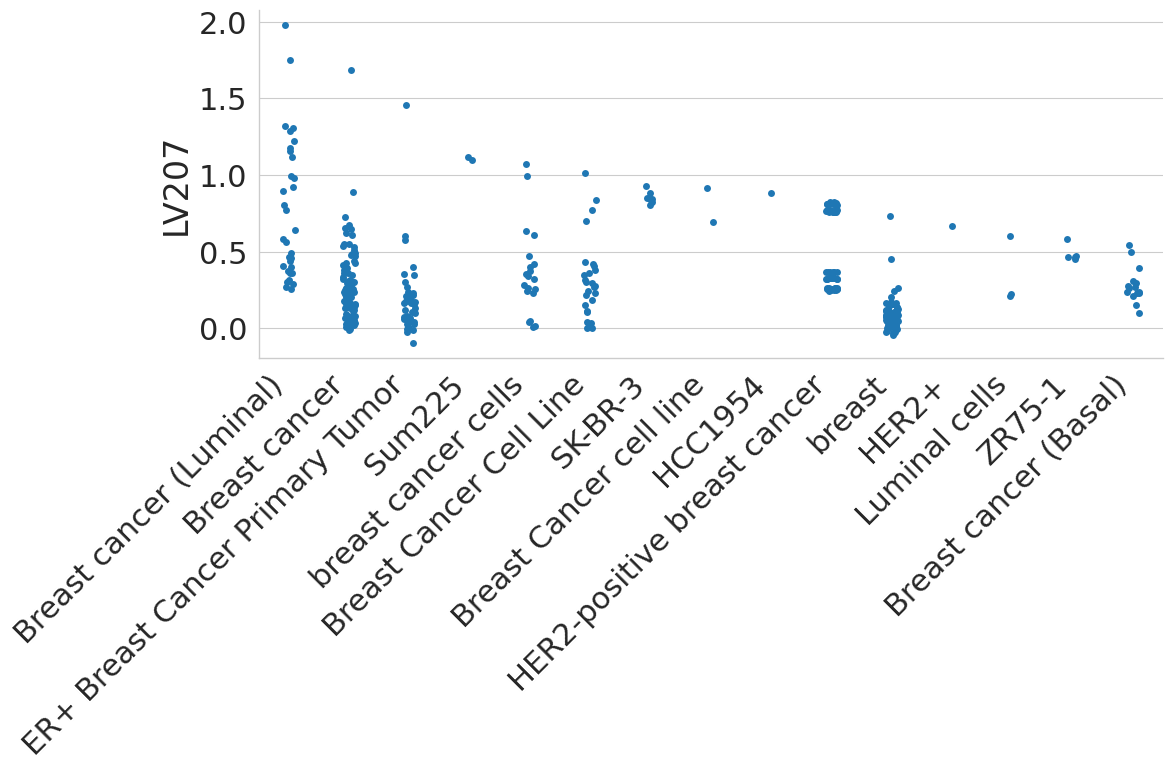

In [41]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [ ]:
reduced_plot_dat

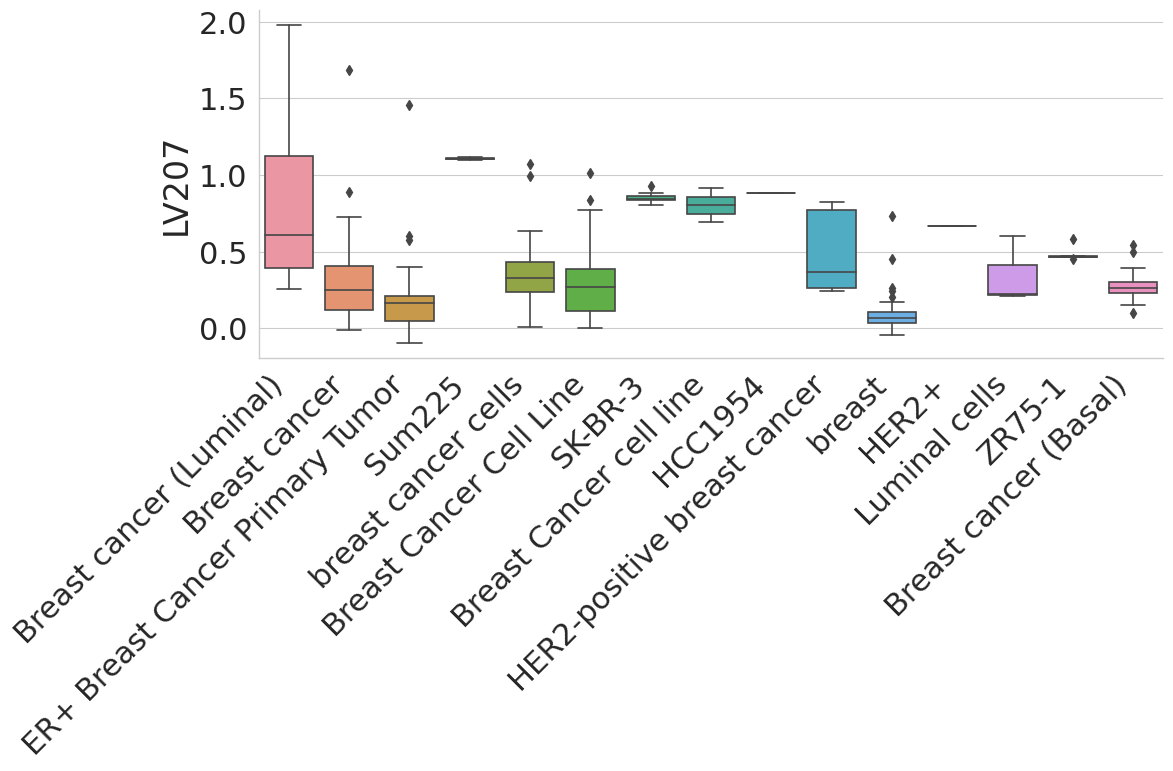

In [42]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

# Debug

In [43]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("breast cancer")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV207
project   run                                              
SRP006575 SRR537128           breast cancer cells  1.070650
          SRR537131           breast cancer cells  0.991355
SRP037775 SRR1168759  HER2-positive breast cancer  0.822811
          SRR1168757  HER2-positive breast cancer  0.821647
          SRR1168748  HER2-positive breast cancer  0.819814
          SRR1168749  HER2-positive breast cancer  0.818540
          SRR1168747  HER2-positive breast cancer  0.818192
          SRR1168756  HER2-positive breast cancer  0.815216
          SRR1168751  HER2-positive breast cancer  0.815188
          SRR1168750  HER2-positive breast cancer  0.814256
          SRR1168755  HER2-positive breast cancer  0.813757
          SRR1168758  HER2-positive breast cancer  0.812317
          SRR1168754  HER2-positive breast cancer  0.809987
          SRR1168760  HER2-positive breast cancer  0.809351
          SRR1168753  HER2-positive breast cancer  0.808086
          SRR1168752  HER2-positive breast cancer  0.804257
          SRR1168745  HER2-positive breast cancer  0.774833
          SRR1168737  HER2-positive breast cancer  0.770692
          SRR1168743  HER2-positive breast cancer  0.769183
          SRR1168733  HER2-positive breast cancer  0.767733

In [44]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP026537"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell line                cell type        subtype  \
project   run                                                              
SRP026537 SRR934645      UACC893            breast cancer        Luminal   
          SRR934644      UACC893            breast cancer        Luminal   
          SRR934640    SUM225CWN            breast cancer        Luminal   
          SRR925694        AU565            breast cancer        Luminal   
          SRR934641    SUM225CWN            breast cancer        Luminal   
          SRR934642      UACC812            breast cancer        Luminal   
          SRR934632      HCC2218            breast cancer        Luminal   
          SRR934631      HCC2218            breast cancer        Luminal   
          SRR934643      UACC812            breast cancer        Luminal   
          SRR1283038    MDAMB453  breast cancer cell line        Luminal   
          SRR925704      HCC1419            breast cancer        Luminal   
          SRR925699      EFM192A            breast cancer        Luminal   
          SRR934633      HCC2218            breast cancer        Luminal   
          SRR925701      EFM192C            breast cancer        Luminal   
          SRR925729        SKBR3            breast cancer        Luminal   
          SRR925700      EFM192B            breast cancer        Luminal   
          SRR925741       ZR7530            breast cancer        Luminal   
          SRR925740        ZR751            breast cancer        Luminal   
          SRR925710      HCC1954            breast cancer          Basal   
          SRR925707      HCC1599            breast cancer          Basal   
          SRR925696        BT483            breast cancer        Luminal   
          SRR925735      SUM52PE            breast cancer        Luminal   
          SRR925742        ZR75B            breast cancer        Luminal   
          SRR925718          LY2            breast cancer        Luminal   
          SRR925725     MDAMB175            breast cancer        Luminal   
          SRR925695        BT474            breast cancer        Luminal   
          SRR925706      HCC1569            breast cancer          Basal   
          SRR925711       HCC202            breast cancer        Luminal   
          SRR925698        CAMA1            breast cancer        Luminal   
          SRR925693       600MPE            breast cancer        Luminal   
          SRR925727     MDAMB361            breast cancer        Luminal   
          SRR925715        HCC70            breast cancer          Basal   
          SRR925723         MCF7            breast cancer        Luminal   
          SRR925728          MX1            breast cancer        unknown   
          SRR925689        21MT1            breast cancer          Basal   
          SRR925705      HCC1428            breast cancer        Luminal   
          SRR925692         21PT            breast cancer          Basal   
          SRR925724   MDAMB134VI            breast cancer        Luminal   
          SRR925691         21NT            breast cancer          Basal   
          SRR925717        JIMT1            breast cancer          Basal   
          SRR925737   T47D Kbluc            breast cancer        unknown   
          SRR925736         T47D            breast cancer        Luminal   
          SRR925734     SUM229PE            breast cancer        unknown   
          SRR925690        21MT2            breast cancer          Basal   
          SRR925702      HCC1143            breast cancer          Basal   
          SRR925709      HCC1937            breast cancer          Basal   
          SRR934638     SUM149PT            breast cancer          Basal   
          SRR925713      HCC3153            breast cancer          Basal   
          SRR934639     SUM149PT            breast cancer          Basal   
          SRR925688        184B5            breast cancer  Non-malignant   
          SRR934634       MCF12A            breast cancer  Non-malignan

# Reduced plot

## Data stats

In [45]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

count    1215.000000
mean        0.189624
std         0.236935
min        -0.104168
25%         0.039559
50%         0.117198
75%         0.268133
max         1.976458
Name: LV207, dtype: float64

In [46]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

,count,mean,std,min,25%,50%,75%,max
cell type,,,,,,,,
Sum225,2.0,1.107727,0.010011,1.100648,1.104188,1.107727,1.111267,1.114806
HCC1954,1.0,0.885536,NaN,0.885536,0.885536,0.885536,0.885536,0.885536
SK-BR-3,8.0,0.852694,0.037756,0.805903,0.836135,0.842347,0.860851,0.928411
Breast Cancer cell line,2.0,0.804607,0.156657,0.693834,0.749221,0.804607,0.859994,0.915380
HER2+,1.0,0.668840,NaN,0.668840,0.668840,0.668840,0.668840,0.668840
...,...,...,...,...,...,...,...,...
gastrointestinal stromal tumor,9.0,-0.049720,0.057214,-0.099230,-0.082479,-0.060148,-0.040315,0.090903
myxoid liposarcoma,7.0,-0.062340,0.027196,-0.104168,-0.074622,-0.069972,-0.044963,-0.023067
Ewing's sarcoma,6.0,-0.063304,0.030625,-0.102358,-0.080775,-0.070411,-0.039735,-0.022903


In [47]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

Index(['Sum225', 'HCC1954', 'SK-BR-3', 'Breast Cancer cell line', 'HER2+',
       'Breast cancer (Luminal)', 'breast adenocarcinoma', 'ZR75-1',
       'triple negative breast cancer cell line', 'lung adenocarcinoma',
       'Luminal', 'ZR-75-1', 'BT-474', 'MDA-MB-468',
       'HER2-positive breast cancer', 'LAPC-4', 'MDAMB468',
       'Triple negative breast cancer cell line containing an activating Notch1 mutation, grown in suspension',
       'breast cancer cells', '11-18', 'MCF-7M', 'human lung Adenocarcinoma',
       'BT-20', 'Breast Cancer Cell Line', 'Breast cancer (Basal)', 'CWR22',
       'C4-2B', 'Non-small-cell lung cancer (NSCLC) cells', 'MCF-7',
       'Breast cancer', 'HCC1419', 'Breast cancer (unknown)',
       'PC9 NSCLC cell line', 'MDA PCa 2b', 'PWR-1E', 'DCIS', 'Luminal cells',
       'Human breast cancer cells', 'Sum102', 'OVCAR3', 'IDC cells',
       'ER+ Breast Cancer Primary Tumor', 'epithelial cell',
       'Breast adenocarcinoma epithelial cells',
       'Triple

In [48]:
final_plot_data.shape

(1215, 2)

In [49]:
reduced_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [50]:
reduced_plot_data.shape

(672, 2)

## Shorten context names

In [51]:
reduced_plot_data = reduced_plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "tonsil Innate lymphoid cells (ILC3)": "tonsil ILCs (ILC3)",
            "tonsil Innate lymphoid cells (NK)": "tonsil ILCs (NK)",
            "tonsil Innate lymphoid cells (ILC2)": "tonsil ILCs (ILC2)",
            "tonsil Innate lymphoid cells (ILC1)": "tonsil ILCs (ILC1)",
            "primary human NK cells": "NK cells",
            "primary human neutrophils": "Neutrophils",
        }
    }
)

## Set x-axis order

In [52]:
attr_order = (
    reduced_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [53]:
len(attr_order)

15

In [54]:
attr_order

['Sum225',
 'HCC1954',
 'SK-BR-3',
 'Breast Cancer cell line',
 'HER2+',
 'Breast cancer (Luminal)',
 'breast adenocarcinoma',
 'ZR75-1',
 'triple negative breast cancer cell line',
 'lung adenocarcinoma',
 'Luminal',
 'ZR-75-1',
 'BT-474',
 'MDA-MB-468',
 'HER2-positive breast cancer']

## Plot

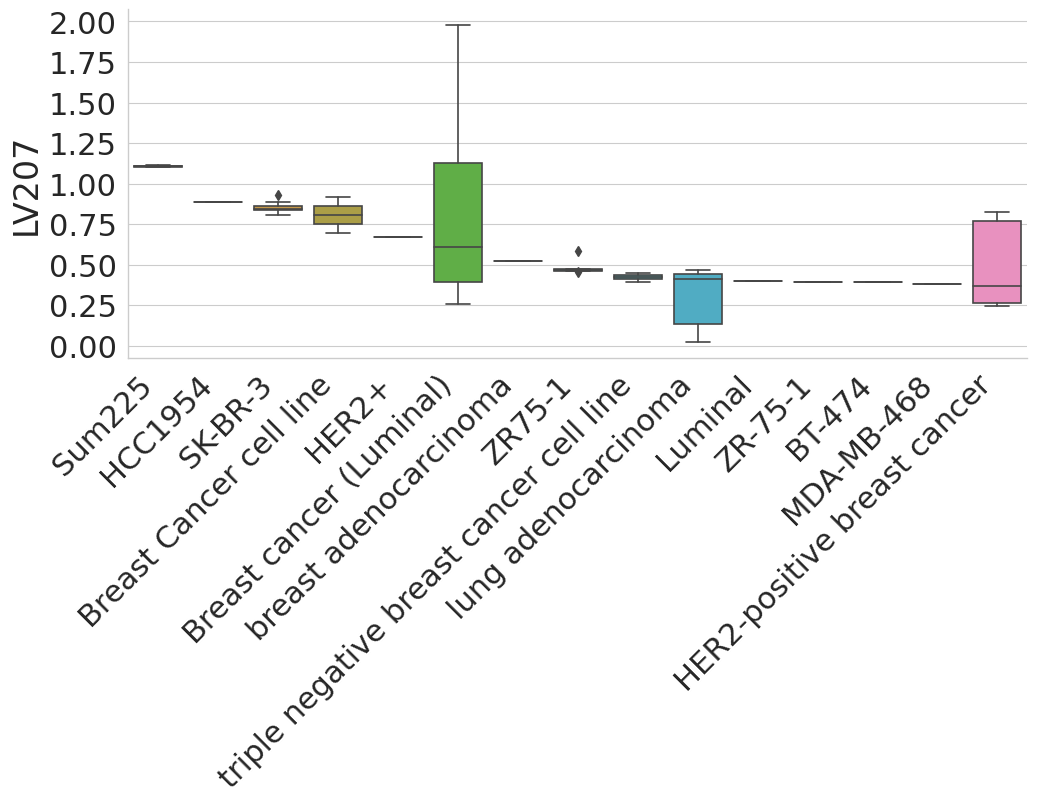

In [55]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=reduced_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )